In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
df = pd.read_csv('netflix_titles.csv')

In [3]:
# Lihat Struktur Awal Data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
# Mengecek apakah ada duplicate di seluruh kolom
check_duplicate = df.duplicated().sum()

print(f"Jumlah data yang duplikat = {check_duplicate}")

Jumlah data yang duplikat = 0


In [7]:
# Handling duplicate
df = df.drop_duplicates()

In [8]:
# Mengecek duplicate setelah di-handle
handle_duplicate = df.duplicated().sum()

print(f"Jumlah data yang duplikat = {handle_duplicate}")

Jumlah data yang duplikat = 0


In [9]:
# Handling Missing Value
print("Cek missing value:\n", df.isnull().sum())

Cek missing value:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [10]:
# Tampilkan persen missing value
missing_percent = df.isnull().mean() * 100
print("Persentase missing value:\n", missing_percent)

Persentase missing value:
 show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


In [11]:
# Handle kolom dengan banyak missing: isi dengan 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

In [12]:
# Drop baris dengan missing value kecil
df = df.dropna(subset=['date_added', 'rating', 'duration'])

In [13]:
# Cek ulang untuk memastikan tidak ada missing value
print("Sisa missing value setelah penanganan:\n", df.isnull().sum())

Sisa missing value setelah penanganan:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [14]:
# Label encoding untuk kolom 'type' (Movie = 0, TV Show = 1)
df['type_encoded'] = df['type'].map({'Movie': 0, 'TV Show': 1})
df[['type', 'type_encoded']].head()

,type,type_encoded
0,Movie,0
1,TV Show,1
2,TV Show,1
3,TV Show,1
4,TV Show,1


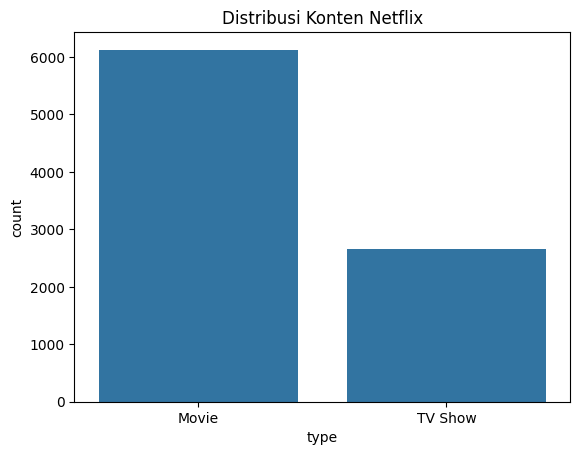

In [ ]:
# Distribusi konten berdasarkan jenis (Film atau TV Show)
sns.countplot(data=df, x='type')
plt.title('Distribusi Konten Netflix')
plt.show()

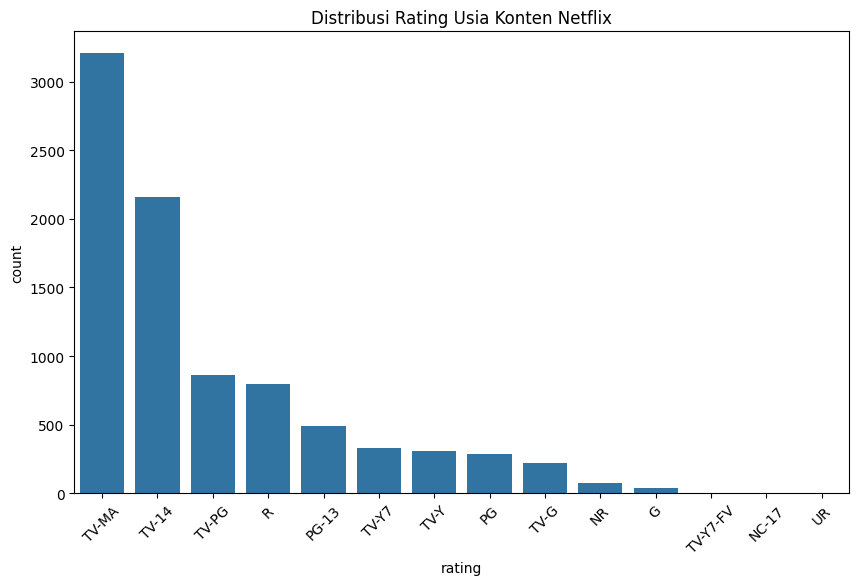

In [16]:
# Distribusi konten berdasarkan rating usia
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.title('Distribusi Rating Usia Konten Netflix')
plt.xticks(rotation=45)
plt.show()

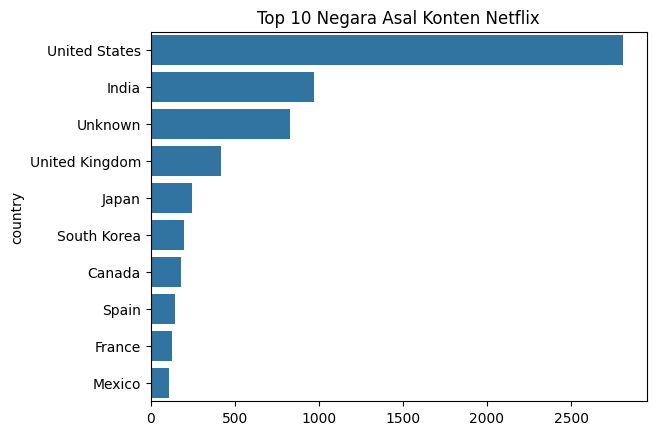

In [17]:
# Negara dengan jumlah konten terbanyak
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Negara Asal Konten Netflix')
plt.show()